In [22]:
import seaborn as sns
import pandas as pd
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### check missing values

In [27]:
df.isnull().sum() # shows count of null values

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<Axes: >

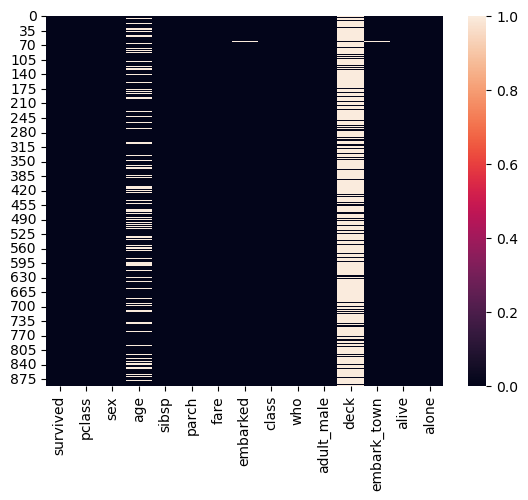

In [29]:
sns.heatmap(df.isnull()) # heatmap of null values

### handling missing values

In [ ]:
#1. delete rows with missing values
df.dropna()

#2 delete columns with missing values
df.dropna(axis=1)

#3 mean Imputation (works well when data is normally distrubuted)
df['Age_mean'] = df['age'].fillna(df['age'].mean())

#4 median value imputation (works well with dataset with outliers)
df['Age_median'] = df['age'].fillna(df['age'].median())

#5 mode value imputation (works well wit categorical data)
mode = df[df['age'].notna()]['embarked'].mode()[0]

df['embarked_mode'] = df['embarked'].fillna(mode)

### Handling imbalanced dataset

This is to handle imbalanced distribution of categorical data.

In [36]:


import pandas as pd
import numpy as np


In [44]:
# set the random seed for reproducibility
np.random.seed(123) 

# create a data frame with two classes
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0
n_class_1, n_class_0

(100, 900)

In [60]:
class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})
class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})
df = pd.concat([class_0,class_1]).reset_index(drop=True)
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

#### 1. Upsampling 

In [74]:
df_minority = df[df['target']==1]
df_majority = df[df['target']==0]

In [ ]:
# perform upsampling
from sklearn.utils import resample

df_monirity_upsample = resample(df_minority,
                                replace=True, # sample with replacement
                                n_samples=len(df_majority), # to match the majority class
                                random_state = 42
                               )
df_monirity_upsample.shape

(900, 3)

In [84]:
df_upsampled = pd.concat([df_majority,df_monirity_upsample])
df_upsampled['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64

#### 2. Downsampling

In [90]:
# perform downsampling
from sklearn.utils import resample

df_majority_downsample = resample(df_majority,
                                replace=False, # sample without replacement
                                n_samples=len(df_minority), # to match the majority class
                                random_state = 42
                               )
df_majority_downsample.shape

(100, 3)

In [ ]:
df_downsampled = pd.concat([df_majority_downsample,df_minority])
df_downsampled['target'].value_counts()

target
0    100
1    100
Name: count, dtype: int64

#### 3. SMOTE (Synthetic Minority Oversampling Technique)

It is a technique used in machine learning to address imbalanced datasets where the minority class has significantly fewer instances 
than the majority class. SMOTE involves generating synthetic instances of the minority class by interpolating between existing instances

it produces new data by connecting the nearest existing minority data points and creating new data points along the line. 

In [2]:
from sklearn.datasets import make_classification


In [4]:
# x is independent feature
# y is dependent feature

x,y = make_classification(n_samples=1000,n_features=2,n_clusters_per_class=1,weights=[0.90],random_state=1,n_redundant=0)

In [6]:
import pandas as pd
df1 = pd.DataFrame(x,columns=['f1','f2'])
df2 = pd.DataFrame(y,columns=['target'])
final_df = pd.concat([df1,df2],axis=1)
final_df['target'].value_counts()

target
0    894
1    106
Name: count, dtype: int64

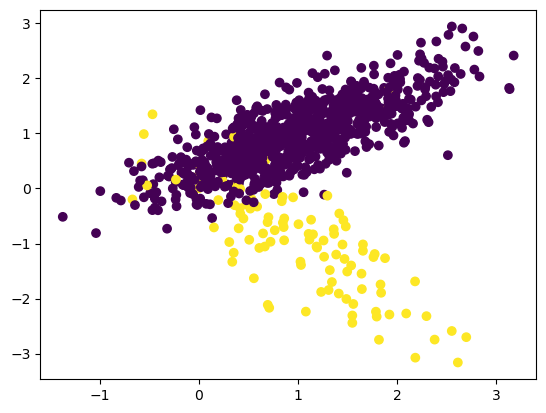

In [8]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])

In [14]:
from imblearn.over_sampling import SMOTE
# transform the dataset
oversample = SMOTE()
x,y = oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

In [26]:
df1 = pd.DataFrame(x,columns=['f1','f2'])
df2 = pd.DataFrame(y,columns=['target'])
oversampled_df = pd.concat([df1,df2],axis=1)
oversampled_df['target'].value_counts()


target
1    894
0    894
Name: count, dtype: int64

### 4. Data Interpolation
Data interpolation is the process of estimating unknown values within a dataset based on the known values. In Python, there are various libraries available that can be used for data interpolation, such as NumPy, SciPy and Pandas.

#### 4.1 Linear Interpolation

In [31]:
import numpy as np
x = np.array([1,2,3,4,5])
y = np.array([2,4,6,8,10])

# interpolate the data using linear interpolation in numpy
x_new = np.linspace(1,5,10) # create new x values
y_interp = np.interp(x_new,x,y) # interpolate y values
print(y_interp)

[ 2.          2.88888889  3.77777778  4.66666667  5.55555556  6.44444444
  7.33333333  8.22222222  9.11111111 10.        ]


#### 4.2 Cubic Interpolation with scipy

In [39]:
import numpy as np
x = np.array([1,2,3,4,5])
y = np.array([1,8,27,64,125])

from scipy.interpolate import interp1d

# interpolate the data using cubic interpolation
f = interp1d(x,y,kind='cubic') # create a cubic interpolation function
x_new = np.linspace(1,5,10) # create new x values
y_interp = f(x_new) # interpolate y values
print(y_interp)

[  1.           3.01371742   6.739369    12.7037037   21.43347051
  33.45541838  49.2962963   69.48285322  94.54183813 125.        ]


#### 4.3 Polynomial Interpolation

In [43]:
import numpy as np
x = np.array([1,2,3,4,5])
y = np.array([1,4,9,15,25])

# interpolate the data using polynomial interpolation
p = np.polyfit(x,y,4) # fit a 2nd degree ppolynomial to the data
x_new = np.linspace(1,5,10) # create new x values
y_interp = np.polyval(p,x_new) # interpolate y values
print(y_interp)

[ 1.          1.85881217  3.51099934  5.57613169  7.82985317 10.20388152
 12.78600823 15.82009856 19.70609155 25.        ]


### Handling outliers

### 5 number summary
1. minimum
2. first Quartile Q1
3. Median
4. Third Quartile Q3
5. Maximum

lower fence = Q1 - 1.5 * IQR

higher fence = Q3 + 1.5 * IQR

IQR = Q3 - Q1

In [57]:
import numpy as np
marks = [45,32,56,75,89,54,32,89,90,87,54,45,98,99,67,74,1000,1100]
# Q1 = np.percentile(marks,[25])
# Q2 = np.percentile(marks,[75])
# med = np.percentile(marks,[50])
# minimum = np.percentile(marks,[0])
minimum,Q1,med,Q3,maximum = np.quantile(marks,[0,.25,.50,.75,1])
IQR = Q3-Q1
lower_fence = Q1-1.5*IQR
higher_fence = Q3+1.5*IQR
lower_fence,higher_fence

(0.375, 143.375)

### boxplot for outliers

<Axes: >

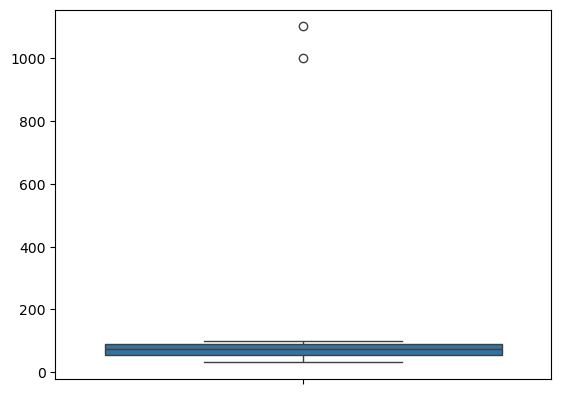

In [61]:
import seaborn as sns
sns.boxplot(marks)